# The relation of bikers characteristics with the duration time
## by (Patrick Gitau)

## Investigation Overview
For the investigation, I'm most interested in figuring out the relationship of certain features to the period the trip takes. The main features of focus are member's user types, birth year, gender and bike share for all trip.
## Dataset Overview
The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.This dataset represents trips taken by 183,412  members of the service for month of February of 2019. With miswing values for the members birth year and member gender, some of the observation were dropped. Also, the data was grouped in terms of ages; Old, Adult, Teen to help ease up visualization.

In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [11]:
# load in the dataset into a pandas dataframe
fordgobike= pd.read_csv(r"C:\Users\pgita\Desktop\JUPYTER CLASS\Udacity class\Project\Visualization project\Fordgobike project\First submittion\201902-fordgobike-tripdata.csv")

In [12]:
# Make copies of original pieces of data
fordgobike_clean = fordgobike.copy()

# removing some of the columns
columns_to_drop = ['start_time', 'end_time','end_station_name', 'start_station_id', 'start_station_name','end_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','bike_id']
fordgobike_clean.drop(labels=columns_to_drop, axis="columns", inplace=True)

# Subtracting 2019 with member_birth_year to get age of the member
fordgobike_clean['member_age'] = 2019-fordgobike_clean['member_birth_year']

# Dropping the missing values
fordgobike_clean.dropna(inplace=True)

# changing the age data type from float to int.
fordgobike_clean['member_age']=fordgobike_clean['member_age'].astype(int)

rows_to_drop=fordgobike_clean.query('duration_sec > 4000').index
fordgobike_clean.drop(labels=rows_to_drop, axis="rows", inplace=True)

In [13]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [17.0, 35.0, 60.0, 141.0]

# Labels for the four Age groups level
bin_names = ['Teen', 'Adult', 'Old']

# Creates Ages groups level column
fordgobike_clean['member_age_groups'] = pd.cut(fordgobike_clean['member_age'], bin_edges, labels=bin_names, right=True)


## Distribution for the duration variable
Duration has a long-tailed distribution, with a lot of bikers taking on the low duration end and few on the high duration end. When plotted on a log-scale, the duration distribution is bimodal, with the highest peak between 400 and 800 seconds.

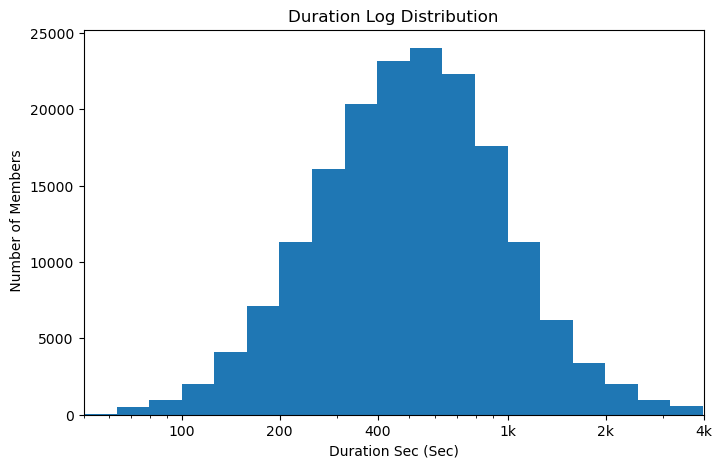

In [14]:
# there's a long tail in the distribution, so let's put it on a log scale instead
def log_scale_plot (logsize, variable):
    log_binsize = logsize
    bins = 10 ** np.arange(1, np.log10(fordgobike_clean[variable].max())+log_binsize, log_binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = fordgobike_clean, x = variable, bins = bins)
    plt.xscale('log')

# Plotting
log_scale_plot(0.1,'duration_sec')
plt.xlim([50,4000])
plt.xticks([100, 200, 400, 1e3, 2e3, 4e3], [100, 200, 400, '1k', '2k', '4k'])
plt.xlabel('Duration Sec (Sec)')
plt.ylabel(' Number of Members')
plt.title('Duration Log Distribution')
plt.show()

## Count for all members characteristics
From the dataset, most of the members are males and there is no much bike sharing through the trip. Also, Subscribers are in great numbers compared to the customer. The data consist mostly of the Young population with the teen and adults dominating in terms of their numbers.

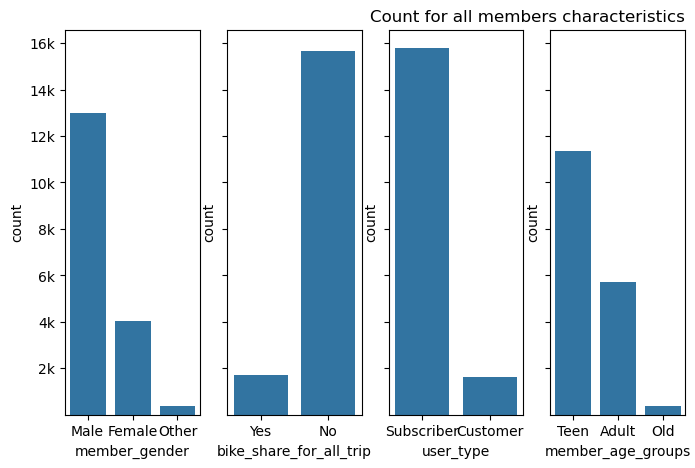

In [15]:
# let's plot all categorical variable to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(ncols=4, sharey='all', figsize = [8,5])
plt.yticks([2e4, 4e4, 6e4, 8e4, 1e5, 12e4, 14e4, 16e4], ['2k', '4k', '6k', '8k', '10k', '12k', '14k', '16k'])
label = 'Count for all members characteristics'
plt.title(label, loc='right')

default_color = sb.color_palette()[0]
sb.countplot(data = fordgobike_clean, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = fordgobike_clean, x = 'bike_share_for_all_trip', color = default_color, ax = ax[1])
sb.countplot(data = fordgobike_clean, x = 'user_type', color = default_color, ax = ax[2])
sb.countplot(data = fordgobike_clean, x = 'member_age_groups', color = default_color, ax = ax[3])
plt.show()

## Fraction of member bike share for the trip in relation to age group
Inspite of the teen age members large numbers, according to the total number of age groups, most of the old age members share the bike during the trip followed by the teen and lastly the adult members



,member_age_groups
Teen,0.106413
Adult,0.079309
Old,0.183918


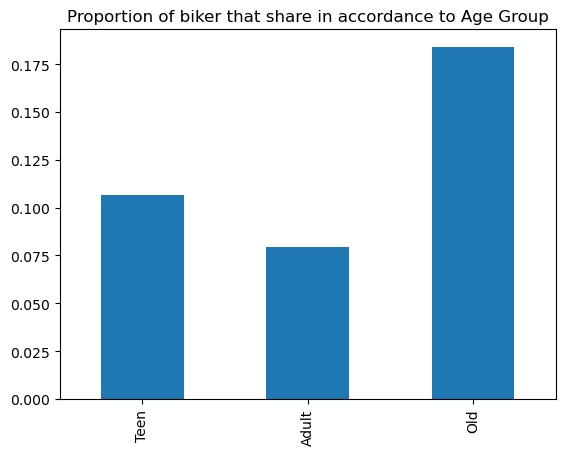

In [16]:
# converegion of bike_share_for_all_trip object into int
fordgobike_clean['bike_share'] = (fordgobike_clean['bike_share_for_all_trip']=='Yes').astype(int) 

#creating a numeric observation for the member in term of bike sharing
No_share=fordgobike_clean.query('bike_share == 0')
share=fordgobike_clean.query('bike_share == 1')

#Creating bar plot formula
def bar_plot(data):
    bar=data.plot(kind="bar",sort_columns=True)
    rtf=pd.DataFrame(data)
    return bar, rtf

#Getting the relation of bike sharing with the age groups in accordance to the total number of age group
share_proportion=(share['member_age_groups'].value_counts()/fordgobike_clean['member_age_groups'].value_counts())
plt.title('Proportion of biker that share in accordance to Age Group' )
share_proportion.sort_values()
bar, rtf =bar_plot(share_proportion);
rtf

## Relation of the old subscribers and customers who don't share their bike for the trip
Most of this members are between the age of 60 to 80 with a duration time of between 18 to 2000 sec. They are mostly composed of subscribers as expected and less customers with both Customers and subscribers mostly sharing the same position; in the age range of 60 to 80 and time duration of 18 to 2000.

Text(0.5, 1.0, "Old subscribers and customers who don't share their bike for the trip")

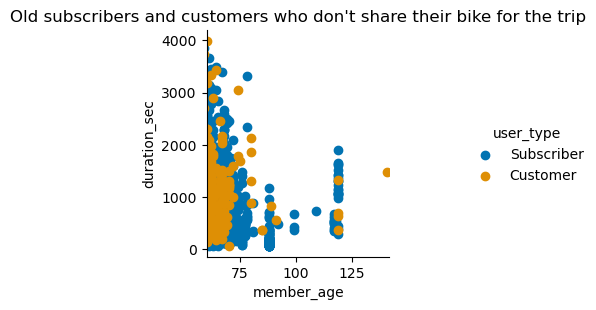

In [18]:
g = sb.FacetGrid(data = No_share, hue = 'user_type',
                 palette = 'colorblind')
g.map(plt.scatter, 'member_age', 'duration_sec')
g.add_legend()
plt.xlim([60.0, 142.0])
plt.title("Old subscribers and customers who don't share their bike for the trip" )

## Subscribers vs Gender relation to bike share for the trip
Most of the males have a age range of 18 to 75 with most of them who share their bike for the trip have a duration time of 2000 and below, while those who don't share the bike has a higher duration time of 3000 and below. Most of them don't share the bike.<br>
The female in other hand have a age range of 18 to 75 but this is more dominant for those who don't share their bike as compared to those that share.Those who don't share their bike for the trip are also observed to have a higher duration time of about 2500 as compared to 1500 for those who share the bike. Most famale don't share their bikes also. For the others, most of them are between the age of 18 to 60. Those who don't share their bike are also the greatest in number. Those who share their bike take a less duration time compared to those who don't.<br>
Those who don't share their bike for the trip are also observed to have a higher duration time of about 2500 as compared to 1500 for those who share the bike.

In [19]:
fordgobike_clean['type'] = (fordgobike_clean['user_type']=='Subscriber').astype(int) 
customer=fordgobike_clean.query('type == 0')
subscriber=fordgobike_clean.query('type == 1')

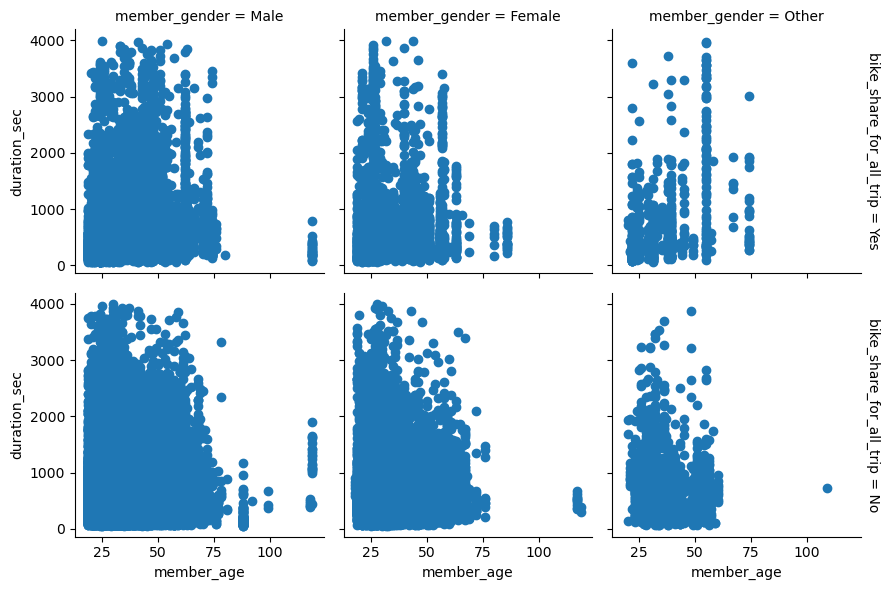

In [21]:
g = sb.FacetGrid(data = subscriber , col = 'member_gender', row = 'bike_share_for_all_trip',
                margin_titles = True);
g.map(plt.scatter, 'member_age', 'duration_sec');

In [23]:
!jupyter nbconvert <Part_II_slide_deck_template>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.
